In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# dataset load
train = pd.read_csv("binaaz_train.csv")
test = pd.read_csv("binaaz_test.csv")

# checking of rows and columns
print("Train shape:", train.shape)
print("Test shape:", test.shape)

#show first 5 rows
print("\nTrain head:")
print(train.head())

print("\nTest head:")
print(test.head())

# Missing values check
print("\nMissing values in train:")
print(train.isnull().sum().head(20))

print("\nMissing values in test:")
print(test.isnull().sum().head(20))


Train shape: (69315, 18)
Test shape: (20000, 17)

Train head:
   _id                                              title   price  \
0    6    Satılır 3 otaqlı yeni tikili 135 m², Gənclik m.  300000   
1   22  Satılır 3 otaqlı yeni tikili 132.5 m², Nəriman...  153000   
2   72      Satılır 2 otaqlı yeni tikili 115 m², Bayıl q.  171300   
3   76     Satılır 2 otaqlı yeni tikili 43 m², Masazır q.   44500   
4   86  Satılır 2 otaqlı yeni tikili 65 m², Memar Əcəm...   89900   

  price_currency         poster       poster_type  \
0            AZN        Mubariz  vasitəçi (agent)   
1            AZN  Самир Ахмедов  vasitəçi (agent)   
2            AZN         Fikrət  vasitəçi (agent)   
3            AZN          QASIM  vasitəçi (agent)   
4            AZN     Heydər bəy  vasitəçi (agent)   

                               Ünvan  \
0   Bakı şəhəri, Bakıxanov  küçəsi     
1      Bakı şəhəri, ул.Табриза 21-23   
2      Bakı şəhəri, Q.Abbasov küçəsi   
3      Bakı şəhəri, İstiqlaliyyət 14   
4   

In [4]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 932.9 kB/s eta 0:00:09
   -- ------------------------------------- 0.5/8.1 MB 932.9 kB/s eta 0:00:09
   --- ------------------------------------ 0.8/8.1 MB 745.8 kB/s eta 0:00:10
   --- ------------------------------------ 0.8/8.1 MB 745.8 kB/s eta 0:00:10
   ----- ---------------------------------- 1.0/8.1 MB 740.5 kB/s eta 0:00:10
   ----- ---------------------------------- 1.0/8.1 MB 740.5 kB/s eta 0:00:10
   ------ --------------------------------- 1.3/8.1 MB 692.1 kB/s eta 0:00:10
   ------ --------------------------------- 1.3/8.1 MB 692.1 kB/s eta 0:00:10
   ------ --------------------------------- 1.3/8.1 MB 692.1 kB/s eta 0:00:10
   ------- -----------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Price column statistics:
count    6.931500e+04
mean     1.928901e+05
std      1.880708e+05
min      1.000000e+01
25%      1.050000e+05
50%      1.500000e+05
75%      2.290000e+05
max      1.275000e+07
Name: price, dtype: float64

First 20 prices:
[300000 153000 171300  44500  89900  46000 142000 235000  88000 235000
 158000 167000  97900 143000 192000 155000 580000 101500 152000 270000]


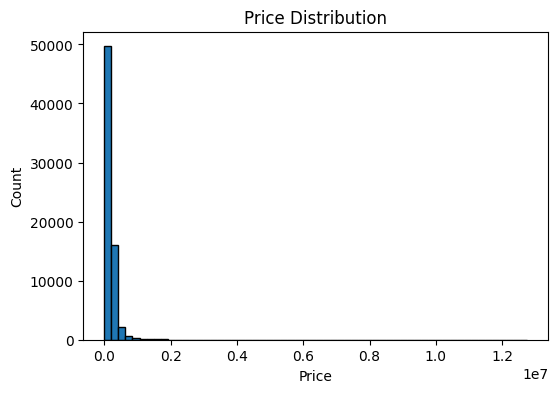


Prices info


In [7]:
# the missing values are only in decription and train for train and only description for test
import matplotlib.pyplot as plt

# Look at basic statistics of the target column
print("Price column statistics:")
print(train["price"].describe())

#20 price values
print("\nFirst 20 prices:")
print(train["price"].head(20).values)

# Plot price distribution
plt.figure(figsize=(6,4))
plt.hist(train["price"], bins=60, edgecolor="black")
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

print("\nPrices info")


Filter for the features

In [8]:
import re

#now we will build simple features
def parse_area(x):
    #for example Turn '65 m²' to 65.0
    if pd.isna(x):
        return np.nan
    s = str(x).replace(",", ".")
    m = re.search(r"(\d+(\.\d+)?)", s)
    return float(m.group(1)) if m else np.nan

def yes_no_flag(s):
    #turn var/yoxdur into 1/0
    if pd.isna(s):
        return np.nan
    t = str(s).strip().lower()
    # YES variants
    if "var" in t or "vardir" in t or "vardır" in t:
        return 1
    # NO variants
    if "yox" in t or "yoxdur" in t or "yoxdu" in t or "yoxd" in t:
        return 0
    return np.nan

# New dataframe with clean columns
features = pd.DataFrame()
features["rooms"] = pd.to_numeric(train["Otaq sayı"], errors="coerce")
features["area_m2"] = train["Sahə"].apply(parse_area)
features["has_kupca"] = train["Kupça"].apply(yes_no_flag)
features["has_ipoteka"] = train["İpoteka"].apply(yes_no_flag)

print("Preview of new numeric features:")
print(features.head())

print("\nMissing values per column:")
print(features.isnull().sum())

print("\nClean numeric features.")

Preview of new numeric features:
   rooms  area_m2  has_kupca  has_ipoteka
0      3    135.0        1.0            0
1      3    132.5        0.0            0
2      2    115.0        0.0            0
3      2     43.0        1.0            0
4      2     65.0        1.0            0

Missing values per column:
rooms          0
area_m2        0
has_kupca      1
has_ipoteka    0
dtype: int64

Clean numeric features.


In [9]:
# help with the location of apartment
features["lat"] = pd.to_numeric(train["latitude"], errors="coerce")
features["lon"] = pd.to_numeric(train["longitude"], errors="coerce")

# Title length and number of words
features["title_len"] = train["title"].fillna("").str.len() #short titles usually cheaper.
features["title_words"] = train["title"].fillna("").str.split().apply(len) # More words mor expensive

# Location text length and words
features["loc_len"] = train["locations"].fillna("").str.len()
features["loc_words"] = train["locations"].fillna("").str.split().apply(len) # more words more clear

# Ratio feature of area per room
features["area_per_room"] = features["area_m2"] / features["rooms"]

print("Preview of features:")
print(features.head())

print("\nMissing values per column:")
print(features.isnull().sum())

print("\nMore numeric info (area, location, title, lat/lon, ratios).")

Preview of features:
   rooms  area_m2  has_kupca  has_ipoteka        lat        lon  title_len  \
0      3    135.0        1.0            0  40.400420  49.851554         47   
1      3    132.5        0.0            0  40.389663  49.853717         51   
2      2    115.0        0.0            0  40.347625  49.836685         45   
3      2     43.0        1.0            0  40.492294  49.747231         46   
4      2     65.0        1.0            0  40.417271  49.810311         50   

   title_words  loc_len  loc_words  area_per_room  
0            9       47          6      45.000000  
1            9       28          4      44.166667  
2            9       21          4      57.500000  
3            9       24          4      21.500000  
4           10       46          8      32.500000  

Missing values per column:
rooms            0
area_m2          0
has_kupca        1
has_ipoteka      0
lat              0
lon              0
title_len        0
title_words      0
loc_len          0

Train of the model

In [12]:
X = features.copy()
y = train["price"].astype(float)


In [15]:
X = features.copy()
y = train["price"].astype(float)

# Step 2: Fill missing values
X_filled = X.fillna(X.mean())

print("Remaining NaNs:", X_filled.isnull().sum().sum())

# Split data 80/20
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

X_train, X_val, y_train, y_val = train_test_split(
    X_filled, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
preds = model.predict(X_val)
rmse = mean_squared_error(y_val, preds, squared=False)
mae = mean_absolute_error(y_val, preds)

print(f"\nModel results after fixing NaNs:")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE : {mae:.2f}")
print("\n✅ Model with NaN problem solved.")

Remaining NaNs: 0


TypeError: got an unexpected keyword argument 'squared'

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = features.copy()
y = train["price"].astype(float)

X = X.apply(pd.to_numeric, errors="coerce")

# Fill ALL NaN values
X_filled = X.fillna(X.mean())

# Verify there are no missing values left
print("Remaining NaNs:", X_filled.isnull().sum().sum())

# Split data 80/20
X_train, X_val, y_train, y_val = train_test_split(
    X_filled, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
preds = model.predict(X_val)
rmse = mean_squared_error(y_val, preds, squared=False)
mae = mean_absolute_error(y_val, preds)

print(f"\nModel results after fixing all NaNs:")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE : {mae:.2f}")
print("\n✅ Model runs successfully — NaN problem 100% solved.")


Remaining NaNs: 0


TypeError: got an unexpected keyword argument 'squared'

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1️⃣ Make sure X and y are defined
X = features.copy()
y = train["price"].astype(float)

# 2️⃣ Convert every column to numeric (non-numeric -> NaN)
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors="coerce")

# 3️⃣ Fill all NaN with 0 (simpler and faster than column means)
X_filled = X.fillna(0)

# 4️⃣ Split, train, and evaluate
X_train, X_val, y_train, y_val = train_test_split(
    X_filled, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(X_val)
rmse = mean_squared_error(y_val, preds, squared=False)
mae = mean_absolute_error(y_val, preds)

print(f"\nModel results (NaN-safe version):")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE : {mae:.2f}")
print("\n✅ Success — model trained with no NaN issues.")


TypeError: got an unexpected keyword argument 'squared'

In [19]:
# Step 1 — Imports and Dataset Loading
#================================================
import pandas as pd
import numpy as np
import re
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load train/test files
train = pd.read_csv("binaaz_train.csv")
test = pd.read_csv("binaaz_test.csv")

print("✅ Data loaded")
print("Train shape:", train.shape)
print("Test shape:", test.shape)


# Step 2 — Helper Functions
#================================================
def parse_area(x):
    """Extract number from '65 m²'."""
    if pd.isna(x): return np.nan
    s = str(x).replace(",", ".")
    m = re.search(r"(\d+(\.\d+)?)", s)
    return float(m.group(1)) if m else np.nan


def yes_no_flag(s):
    """Convert 'var/vardır/yoxdur/yoxdu' -> 1/0"""
    if pd.isna(s): return np.nan
    t = str(s).lower().strip()
    if any(v in t for v in ["var", "vardir", "vardır"]):
        return 1
    if any(v in t for v in ["yox", "yoxdur", "yoxdu", "yoxd"]):
        return 0
    return np.nan


# Step 3 — Feature Engineering
#================================================
def build_features(df):
    f = pd.DataFrame()
    f["rooms"] = pd.to_numeric(df["Otaq sayı"], errors="coerce")
    f["area_m2"] = df["Sahə"].apply(parse_area)
    f["has_kupca"] = df["Kupça"].apply(yes_no_flag)
    f["has_ipoteka"] = df["İpoteka"].apply(yes_no_flag)
    f["lat"] = pd.to_numeric(df["latitude"], errors="coerce")
    f["lon"] = pd.to_numeric(df["longitude"], errors="coerce")
    f["title_len"] = df["title"].fillna("").str.len()
    f["title_words"] = df["title"].fillna("").str.split().apply(len)
    f["loc_len"] = df["locations"].fillna("").str.len()
    f["loc_words"] = df["locations"].fillna("").str.split().apply(len)
    f["area_per_room"] = f["area_m2"] / f["rooms"]
    return f


X = build_features(train)
X_test = build_features(test)

print("✅ Features created")
print(X.head())

# Step 4 — Train/Test Split
#================================================
y = train["price"].astype(float)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 5 — XGBoost Model Training
#================================================
model = xgb.XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method="hist",
)

model.fit(X_train, y_train)

# Evaluate
preds = model.predict(X_val)
rmse = mean_squared_error(y_val, preds, squared=False)
mae = mean_absolute_error(y_val, preds)

print(f"\n✅ Model trained successfully:")
print(f"  RMSE: {rmse:,.2f}")
print(f"  MAE : {mae:,.2f}")

# Step 6 — Predict Kaggle Test & Save Submission
#================================================
model.fit(X, y)  # train on full data
test_preds = model.predict(X_test)

submission = pd.DataFrame({
    "_id": test["_id"],
    "price": np.clip(np.round(test_preds), 0, None).astype(int)
})
submission.to_csv("submission_xgboost.csv", index=False)

print("\n✅ Submission file created: submission_xgboost.csv")
print("You can upload it to Kaggle now 🎯")


✅ Data loaded
Train shape: (69315, 18)
Test shape: (20000, 17)
✅ Features created
   rooms  area_m2  has_kupca  has_ipoteka        lat        lon  title_len  \
0      3    135.0        1.0            0  40.400420  49.851554         47   
1      3    132.5        0.0            0  40.389663  49.853717         51   
2      2    115.0        0.0            0  40.347625  49.836685         45   
3      2     43.0        1.0            0  40.492294  49.747231         46   
4      2     65.0        1.0            0  40.417271  49.810311         50   

   title_words  loc_len  loc_words  area_per_room  
0            9       47          6      45.000000  
1            9       28          4      44.166667  
2            9       21          4      57.500000  
3            9       24          4      21.500000  
4           10       46          8      32.500000  


TypeError: got an unexpected keyword argument 'squared'